# NYC Taxi data in Winter and Summer

Refer to the [Data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) to learn more about the columns that have been provided.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
data_path = 'taxi.csv'

In [7]:
df= pd.read_csv(data_path)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,1.0,N,186,233,1.0,12.0,1.0,0.5,4.08,0.0,0.3,20.38,2.5
1,2.0,2019-07-17 20:26:35,2019-07-17 20:40:09,6.0,1.59,1.0,N,141,161,2.0,10.0,0.5,0.5,0.00,0.0,0.3,13.80,2.5
2,2.0,2019-07-06 16:01:08,2019-07-06 16:10:25,1.0,1.69,1.0,N,246,249,2.0,8.5,0.0,0.5,0.00,0.0,0.3,11.80,2.5
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,1.0,N,229,141,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,1.0,N,237,107,1.0,19.5,0.0,0.5,5.70,0.0,0.3,28.50,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.0,2019-01-18 08:42:15,2019-01-18 08:56:57,1.0,1.18,1.0,N,43,237,1.0,10.0,0.0,0.5,2.16,0.0,0.3,12.96,0.0
196,1.0,2019-01-19 04:34:45,2019-01-19 04:43:44,1.0,2.30,1.0,N,148,234,1.0,9.5,0.5,0.5,2.15,0.0,0.3,12.95,0.0
197,2.0,2019-01-05 10:37:39,2019-01-05 10:42:03,1.0,0.83,1.0,N,237,263,1.0,5.0,0.0,0.5,1.16,0.0,0.3,6.96,0.0
198,2.0,2019-01-23 10:36:29,2019-01-23 10:44:34,2.0,1.12,1.0,N,144,113,2.0,7.0,0.0,0.5,0.00,0.0,0.3,7.80,0.0


In [7]:
df = pd.read_csv(data_path)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month
df_month = df.groupby('month').size().reset_index(name='count')
df_month


,month,count
0,1,100
1,7,100


In [8]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,1.605000,1.560000,3.72935,1.055000,162.26000,169.080000,1.285000,15.402500,0.790000,0.497500,2.013900,0.465700,3.000000e-01,20.154350,1.125000
std,0.519929,1.222239,4.71901,0.335466,64.62985,67.869618,0.452547,15.172931,1.048282,0.035355,2.292065,1.672997,5.565045e-17,17.072769,1.246855
min,1.000000,0.000000,0.16000,1.000000,4.00000,13.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000e-01,4.300000,0.000000
25%,1.000000,1.000000,1.12750,1.000000,132.00000,131.250000,1.000000,7.000000,0.000000,0.500000,0.000000,0.000000,3.000000e-01,10.215000,0.000000
50%,2.000000,1.000000,1.88000,1.000000,161.00000,164.000000,1.000000,9.500000,0.500000,0.500000,1.650000,0.000000,3.000000e-01,14.120000,0.000000
75%,2.000000,2.000000,3.82000,1.000000,230.25000,236.000000,2.000000,17.000000,1.000000,0.500000,2.712500,0.000000,3.000000e-01,22.552500,2.500000
max,4.000000,6.000000,22.00000,5.000000,264.00000,265.000000,2.000000,120.000000,4.500000,0.500000,14.640000,10.700000,3.000000e-01,125.300000,2.500000


In [9]:
def check_tip_amount(data_path):

    df = pd.read_csv(data_path)

    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract month and define seasons
    df['month'] = df['tpep_pickup_datetime'].dt.month
    df['season'] = df['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else ('Summer' if x in [6, 7, 8] else 'Other')
    )
    df['season']

    seasonal_data = df[df['season'].isin(['Winter', 'Summer'])]

    if 'tip_amount' not in seasonal_data.columns:
        seasonal_data['tip_amount'] = seasonal_data['total_amount'] - seasonal_data['fare_amount']

    seasonal_data.loc[:, 'tip_amount'] = pd.to_numeric(seasonal_data['tip_amount'], errors='coerce')

    avg_tips = seasonal_data.groupby('season')['tip_amount'].mean().reset_index()


    winter_tips = seasonal_data[seasonal_data['season'] == 'Winter']['tip_amount']
    summer_tips = seasonal_data[seasonal_data['season'] == 'Summer']['tip_amount']
    return winter_tips, summer_tips, avg_tips



In [10]:
winter_tips, summer_tips, avg_tips =    check_tip_amount(data_path)

In [11]:
winter_tips = pd.to_numeric(winter_tips, errors='coerce')
summer_tips = pd.to_numeric(summer_tips, errors='coerce')

Average Tips:
   season  tip_amount
0  Summer      2.0784
1  Winter      1.9494
T-test statistic: -0.39712452044285573, p-value: 0.691716248380744


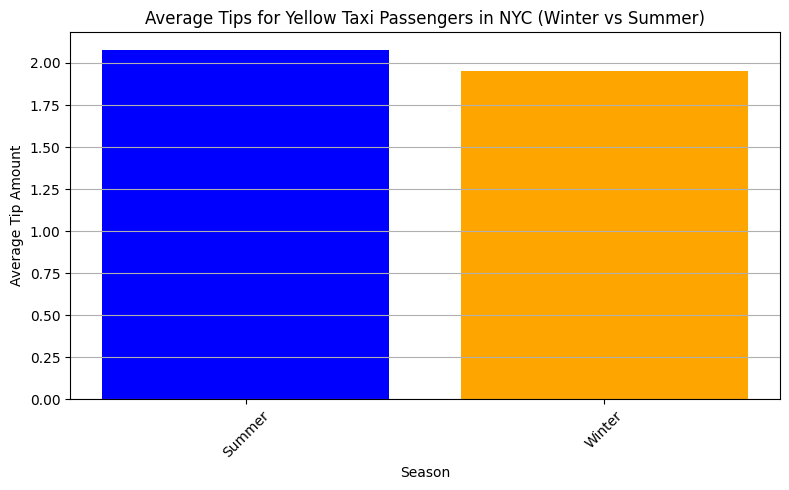

In [12]:
# Hypothesis testing use t_value and p_value
t_stat, p_value = stats.ttest_ind(winter_tips, summer_tips, equal_var=False)

print(f'Average Tips:\n{avg_tips}')
print(f'T-test statistic: {t_stat}, p-value: {p_value}')

plt.figure(figsize=(8, 5))
plt.bar(avg_tips['season'], avg_tips['tip_amount'], color=['blue', 'orange'])
plt.title('Average Tips for Yellow Taxi Passengers in NYC (Winter vs Summer)')
plt.xlabel('Season')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


We can see that  p-value: 0.691716248380744 > 0.05, there for we can not reject the null hypothesis (Summer tip_amounts equal winter tip_amounts)\
Let's see another dataset in the [link](https://data.cityofnewyork.us/browse?sortBy=most_accessed&utf8=%E2%9C%93)

# Explore the NYC Open Data catalog. Identify an additional dataset that could potentially be helpful in answering the client's question.

In [15]:
import requests
import pandas as pd
from io import StringIO

# Cấu hình thời gian cho các tháng cần lấy dữ liệu
months = {
    'January': ("2019-01-01T00:00:00", "2019-01-31T23:59:59"),
    'April': ("2019-04-01T00:00:00", "2019-04-30T23:59:59"),
    'July': ("2019-07-01T00:00:00", "2019-07-31T23:59:59"),
    'October': ("2019-10-01T00:00:00", "2019-10-31T23:59:59")
}

limit = 1000
all_data = []  # Danh sách lưu các DataFrame
for month, (start_date, end_date) in months.items():
    offset = 0

    query_url = (
        f'https://data.cityofnewyork.us/resource/2upf-qytp.csv?'
        f'$limit={limit}&$offset={offset}&'
        f'$where=tpep_pickup_datetime BETWEEN "{start_date}" AND "{end_date}"'
    )

    response = requests.get(query_url)

    if response.status_code == 200:
        data = response.text
        df = pd.read_csv(StringIO(data))

        if df.empty:
            break

        all_data.append(df)

    else:
        print(f"Error: {response.status_code} - {response.text}")
        break


if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv('2019taxi.csv', index=False)
    print("save successful")
else:
    print("None data")


save successful


Average Tips:
   season  tip_amount
0  Summer     2.48470
1  Winter     1.67171
T-test statistic: -6.604905099439392, p-value: 5.225901776807667e-11


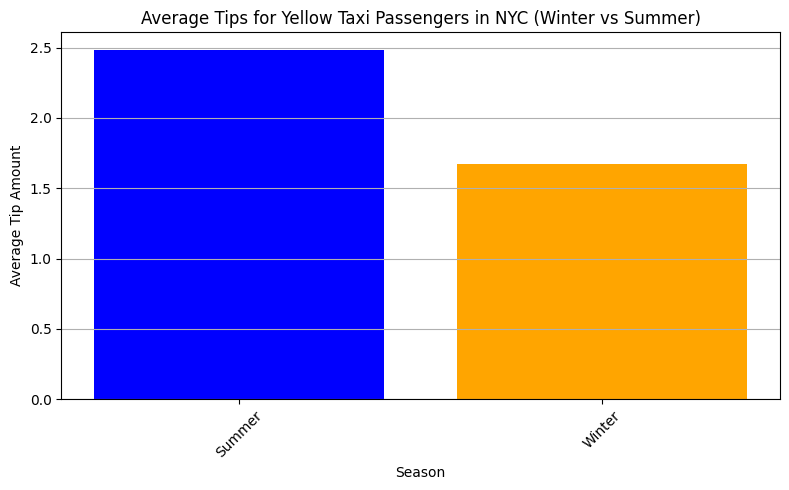

In [16]:
data_path = '2019taxi.csv'

winter_tips, summer_tips, avg_tips =    check_tip_amount(data_path)

winter_tips = pd.to_numeric(winter_tips, errors='coerce')
summer_tips = pd.to_numeric(summer_tips, errors='coerce')


t_stat, p_value = stats.ttest_ind(winter_tips, summer_tips, equal_var=False)

print(f'Average Tips:\n{avg_tips}')
print(f'T-test statistic: {t_stat}, p-value: {p_value}')


plt.figure(figsize=(8, 5))
plt.bar(avg_tips['season'], avg_tips['tip_amount'], color=['blue', 'orange'])
plt.title('Average Tips for Yellow Taxi Passengers in NYC (Winter vs Summer)')
plt.xlabel('Season')
plt.ylabel('Average Tip Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Now we can see that  p-value: 5.225901776807667e-11 
So we have enough basis to reject the H0 hypothesis\
--> Tips_amount tend to be higher in the summer than in the winter

## Clarifying Questions for the Client
Time Frame: What specific years or months are you interested in analyzing? This will help narrow down the data range.\
Tip Definition: How do you define a "tip"? Are you interested in only cash tips, or should we include tips made through credit card transactions as well?\
Comparative Analysis: Are you looking for a specific comparison, such as average tips per trip during each season, or are you interested in more detailed breakdowns, like tips relative to total fares?\
These steps will help ensure a comprehensive approach to answering the client's question effectively.

## What other influences in the data could affect the tip amount?

[]

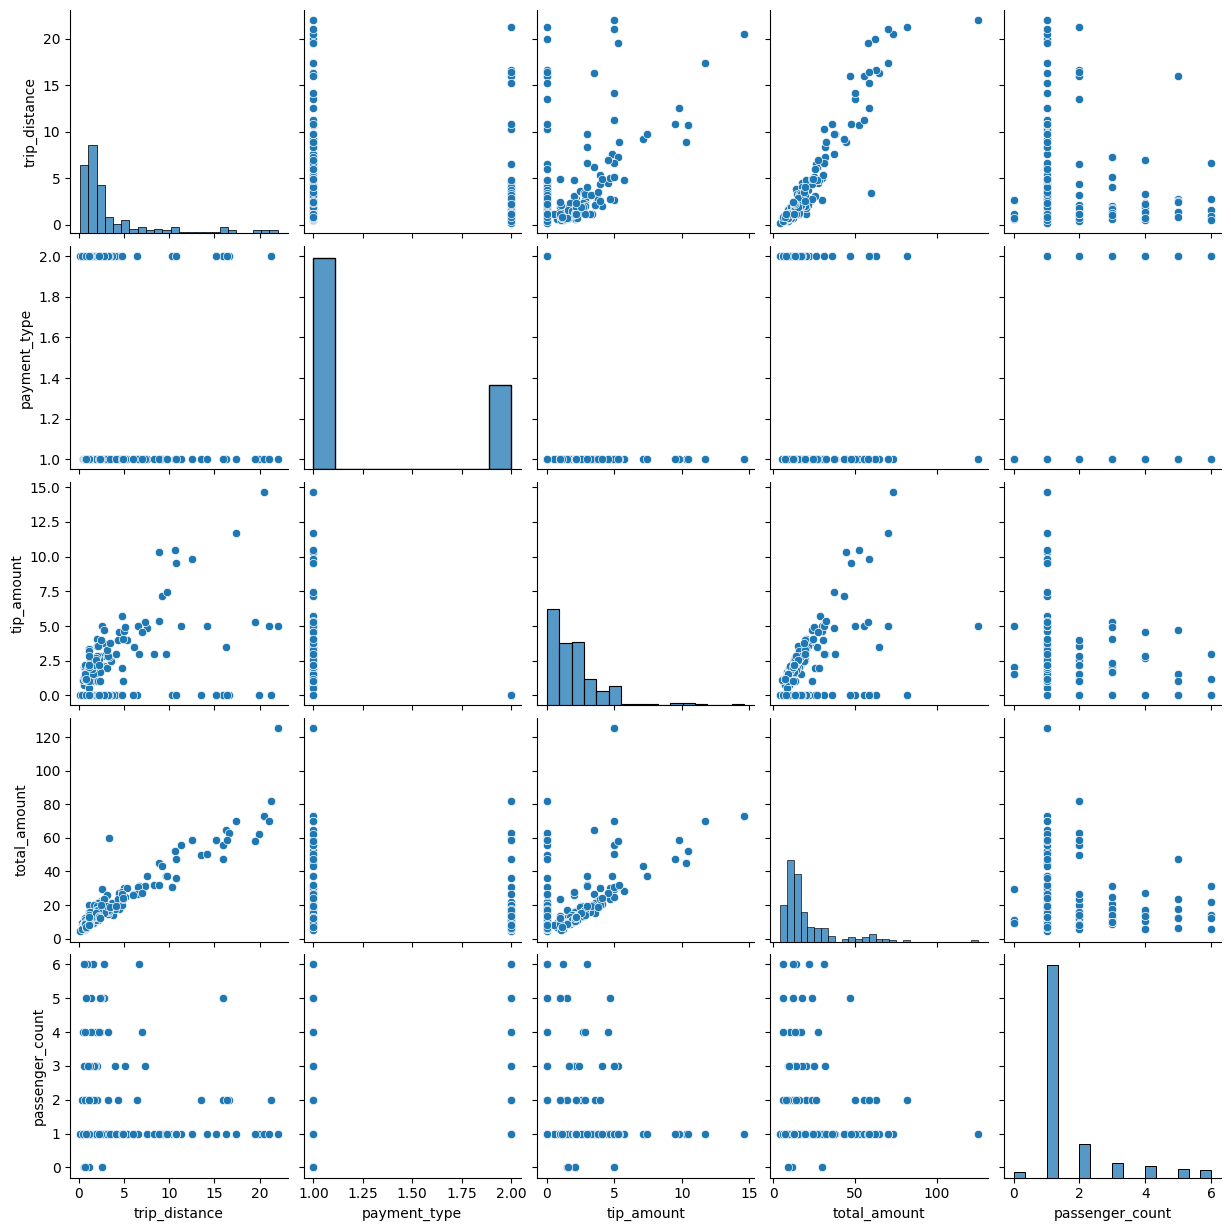

In [19]:
# relationship between many column 
import seaborn as sns
data_path = 'taxi.csv'
df= pd.read_csv(data_path)
sns.pairplot(df[['trip_distance', 'payment_type', 'tip_amount', 'total_amount', 'passenger_count']])
plt.plot()

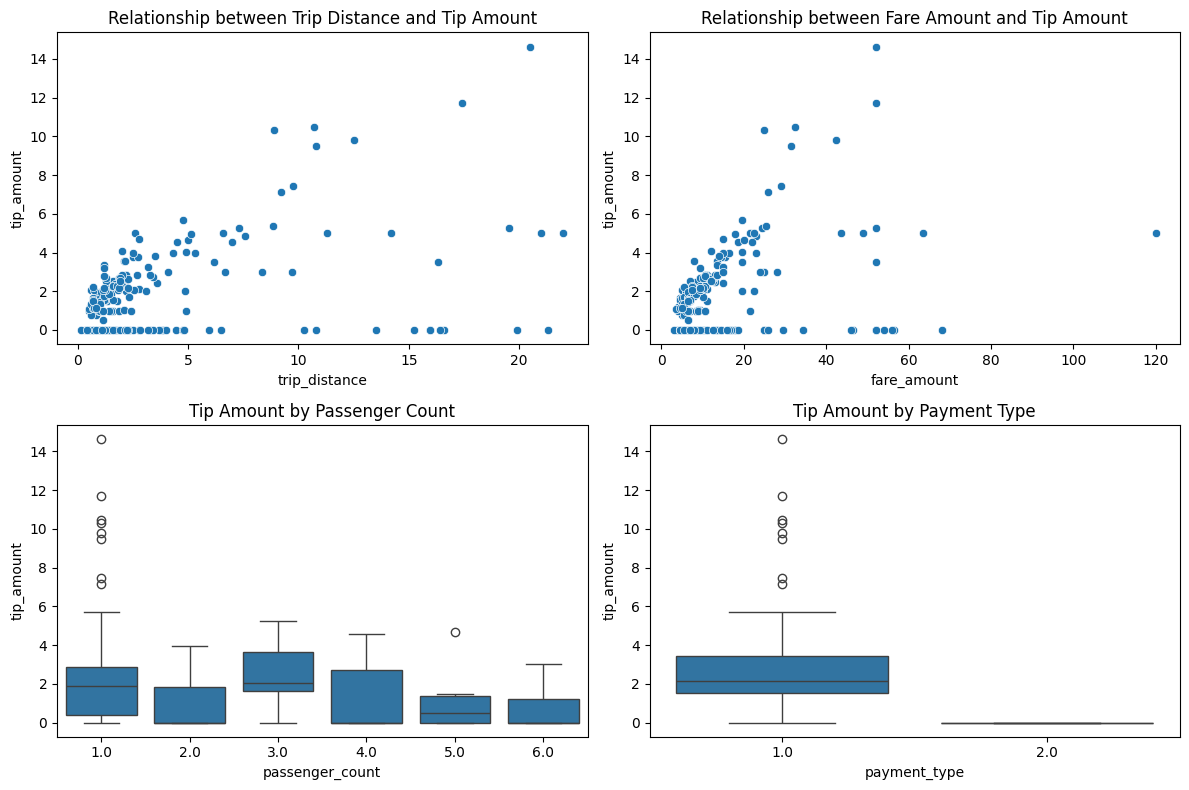

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check the relationship between tip amount and other factors
plt.figure(figsize=(12, 8))

# Relationship between trip distance and tip amount
plt.subplot(2, 2, 1)
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)
plt.title('Relationship between Trip Distance and Tip Amount')

# Relationship between fare amount and tip amount
plt.subplot(2, 2, 2)
sns.scatterplot(x='fare_amount', y='tip_amount', data=df)
plt.title('Relationship between Fare Amount and Tip Amount')

# Relationship between passenger count and tip amount
plt.subplot(2, 2, 3)
sns.boxplot(x='passenger_count', y='tip_amount', data=df[df['passenger_count']!= 0])
plt.title('Tip Amount by Passenger Count')

# Relationship between payment type and tip amount
plt.subplot(2, 2, 4)
sns.boxplot(x='payment_type', y='tip_amount', data=df)
plt.title('Tip Amount by Payment Type')

plt.tight_layout()
plt.show()

Từ biểu đồ trên ta có thể nhận ra rằng có một số yếu tố khác ảnh hưởng đến số lượng tiền tip như:
+ Trip_distance : hầu hết các chuyến đi trong khoảng từ 0 đế 20 miles mới nhận được tiền tip còn các chuến xa hơn thì ít có khả năng nhận tiền tip, đối với khoảng này (0, 20 ) thì dường như xu hướng là khoảng các càng lớn thì tiền tip càng cao
+ Fare amount: cũng giống như khoảng cách, hầu hết các chuyến đi có tiền tip thì giá cước nhỏ hơn 60 $
+ Hầu hết các chuyến đi có tiền tip thì đều trả bằng thẻ tín dụng
+ số lượng tiền tip của các chuyến đi có số hành khách khác nhau thì cũng khác nhau tuy nhiên với lượng dữ liệu nhỏ ta chưa thể kết luận điều gì

Thực hiện tạo model hồi quy để xác định mức độ ảnh hưởng của các biến khác đến số tiền tip

In [ ]:
import statsmodels.api as sm
import pandas as pd

X = df[['fare_amount', 'trip_distance', 'passenger_count',
         'total_amount', 'extra', 'mta_tax',
         'congestion_surcharge', 'improvement_surcharge']]

y = df['tip_amount']


X = sm.add_constant(X)

# regress model
model = sm.OLS(y, X).fit()

# model sumary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     123.8
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.17e-67
Time:                        15:06:15   Log-Likelihood:                -278.47
No. Observations:                 200   AIC:                             572.9
Df Residuals:                     192   BIC:                             599.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fare_amount              -0.69

## Phân Tích Hồi Quy OLS

Dưới đây là phân tích chi tiết về kết quả hồi quy OLS mà bạn đã cung cấp.

## 1. Thông Tin Tổng Quát
- **Biến phụ thuộc (Dependent Variable)**: `tip_amount` (tiền tip).
- **Số quan sát (Observations)**: 200.
- **R-squared**: 0.819 cho thấy khoảng 81.9% biến thiên của tiền tip có thể được giải thích bởi các biến độc lập trong mô hình.
- **Adj. R-squared**: 0.812 cho thấy mô hình có độ chính xác tốt ngay cả khi điều chỉnh số lượng biến độc lập.
- **F-statistic**: 123.8 với p-value rất nhỏ (1.17e-67) cho thấy mô hình có ý nghĩa thống kê cao.

## 2. Phân Tích Các Hệ Số (Coefficients)
Dưới đây là các hệ số hồi quy cho từng biến độc lập:

| Biến độc lập              | Hệ số (coef) | p-value        | Ý nghĩa                                   |
|--------------------------|---------------|----------------|-------------------------------------------|
| fare_amount              | -0.6910      | 0.000          | Tiền fare tăng 1 đơn vị, tiền tip giảm 0.6910 (có ý nghĩa thống kê). |
| trip_distance            | -0.1270      | 0.028          | Mỗi mile tăng lên, tiền tip giảm 0.1270 (có ý nghĩa thống kê). |
| passenger_count          | -0.0561      | 0.346          | Số lượng hành khách không có ý nghĩa thống kê trong việc ảnh hưởng đến tiền tip. |
| total_amount             | 0.6957       | 0.000          | Tổng số tiền tăng 1 đơn vị, tiền tip tăng 0.6957 (có ý nghĩa thống kê). |
| extra                    | -0.2001      | 0.009          | Phí extra tăng lên có thể giảm tiền tip (có ý nghĩa thống kê). |
| mta_tax                  | -7.1269      | 0.013          | Mỗi đơn vị tăng của thuế MTA có thể giảm tiền tip 7.1269 (có ý nghĩa thống kê). |
| congestion_surcharge     | -0.6289      | 0.000          | Phí tắc nghẽn ảnh hưởng tiêu cực đến tiền tip (có ý nghĩa thống kê). |
| improvement_surcharge    | 12.0319      | 0.016          | Phí cải tiến tăng lên có thể làm tăng tiền tip 12.0319 (có ý nghĩa thống kê). |

## 3. Giải Thích Các Kết Quả
- **Tiền fare và tổng tiền**: Như mong đợi, tiền fare cao hơn có thể dẫn đến tip thấp hơn, nhưng tổng số tiền lại có mối quan hệ tích cực với tiền tip. Điều này có thể cho thấy rằng nếu khách hàng chi tiêu nhiều hơn tổng cộng, họ có xu hướng tip cao hơn.

- **Trip distance**: Một khoảng cách đi dài hơn có thể dẫn đến một tiền tip thấp hơn, có thể do tâm lý của khách hàng về việc không thoải mái với một chuyến đi dài.

- **Passenger count**: Không có ý nghĩa thống kê, cho thấy số lượng hành khách không ảnh hưởng rõ rệt đến tiền tip.

- **Extra, MTA Tax, và Congestion Surcharge**: Tất cả đều có ảnh hưởng tiêu cực đến tiền tip, cho thấy rằng các chi phí này có thể làm giảm sự hài lòng của hành khách.

- **Improvement Surcharge**: Có một mối quan hệ tích cực với tiền tip, có thể cho thấy rằng khách hàng cảm thấy giá trị nhận được từ dịch vụ cao hơn khi có khoản phí này.

## 4. Phân Tích Độ Chính Xác và Đánh Giá
- **Omnibus Test**: Giá trị p rất nhỏ cho thấy mô hình không có phân phối chuẩn.
- **Durbin-Watson**: Giá trị khoảng 2 cho thấy không có tự tương quan giữa các sai số.
- **Condition Number**: Lớn (2.80e+03) cho thấy có khả năng đa cộng tuyến mạnh mẽ trong mô hình.

## 5. Kết Luận
Mô hình hồi quy này cho thấy rằng tiền fare, tổng số tiền, phí cải tiến, và các loại phí khác có ảnh hưởng đến tiền tip của hành khách. Tuy nhiên, cần lưu ý rằng mô hình đang bị đa cộng tuyến tức là khả năng các biến có sự phụ thuộc rất cao do vậy cần loại bỏ hoặc thực hiện cộng các biến đó lại để thu được một kết quả đấng tin cậy hơn.



We can display tipamount depending on hour interval in day

In [22]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

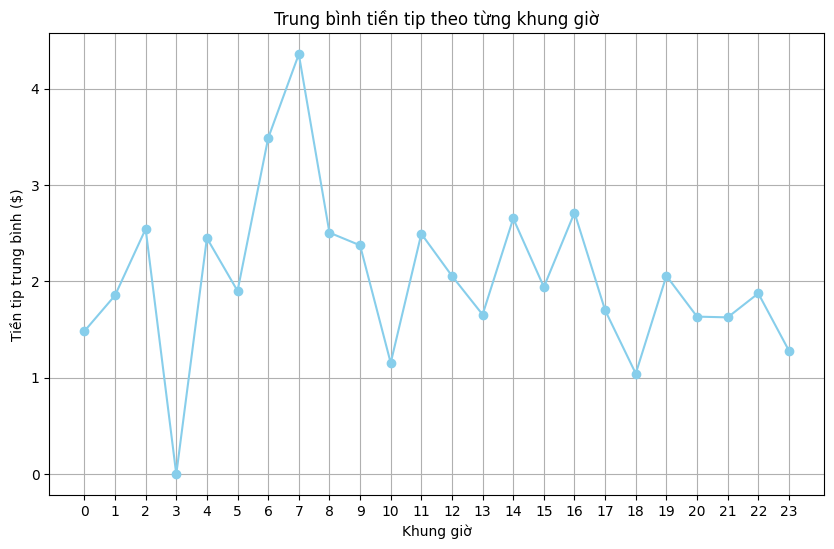

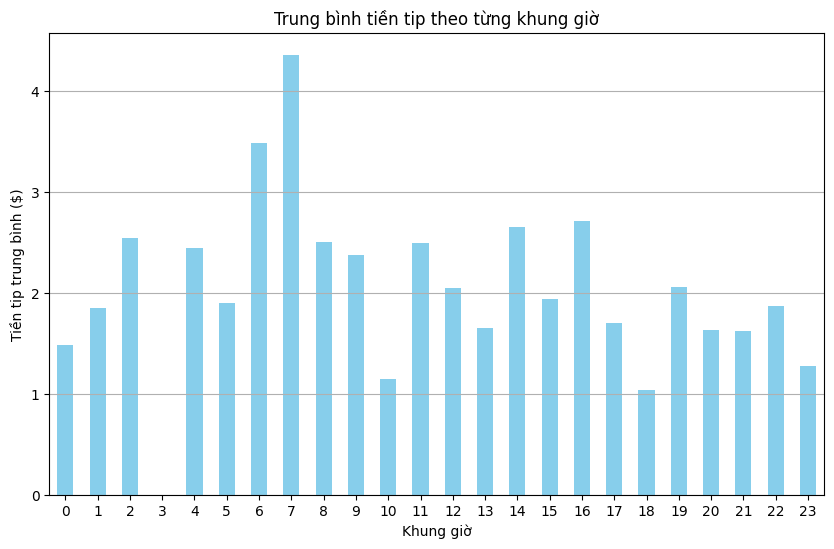

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


df['hour'] = df['tpep_pickup_datetime'].dt.hour

avg_tips_per_hour = df.groupby('hour')['tip_amount'].mean()


plt.figure(figsize=(10, 6))
avg_tips_per_hour.plot(kind='line', marker='o', color='skyblue')
plt.title('Trung bình tiền tip theo từng khung giờ')
plt.xlabel('Khung giờ')
plt.ylabel('Tiền tip trung bình ($)')
plt.xticks(range(24))  
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
avg_tips_per_hour.plot(kind='bar', color='skyblue')
plt.title('Trung bình tiền tip theo từng khung giờ')
plt.xlabel('Khung giờ')
plt.ylabel('Tiền tip trung bình ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()




We can see that the number of tips in the period from 5:00 a.m. to 8:00 a.m. is the largest and that in the remaining time periods, the number of tips is quite equal.
Let's see the another dataset(lager dataset in 2019) 

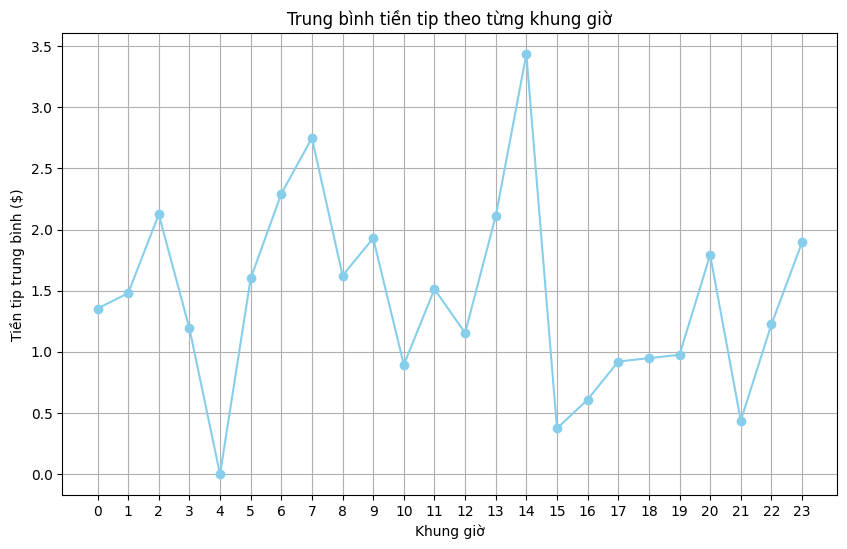

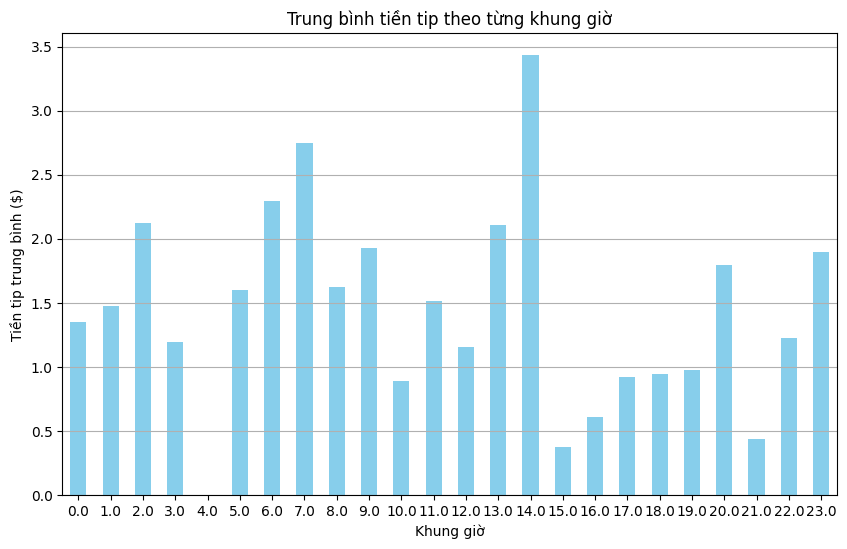

In [24]:
df_2019= pd.read_csv('2019taxi.csv')
df_2019['hour'] = df['tpep_pickup_datetime'].dt.hour

avg_tips_per_hour = df_2019.groupby('hour')['tip_amount'].mean()


plt.figure(figsize=(10, 6))
avg_tips_per_hour.plot(kind='line', marker='o', color='skyblue')
plt.title('Trung bình tiền tip theo từng khung giờ')
plt.xlabel('Khung giờ')
plt.ylabel('Tiền tip trung bình ($)')
plt.xticks(range(24))  
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
avg_tips_per_hour.plot(kind='bar', color='skyblue')
plt.title('Trung bình tiền tip theo từng khung giờ')
plt.xlabel('Khung giờ')
plt.ylabel('Tiền tip trung bình ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

We can see in the time from Between 3pm and 7pm the number of tips seems to be the smallest

Now let see Order the influence of factors on tips by applying a simple model

Mức độ quan trọng của các biến:
trip_distance           0.584502
fare_amount             0.280092
passenger_count         0.100050
congestion_surcharge    0.035356
dtype: float64


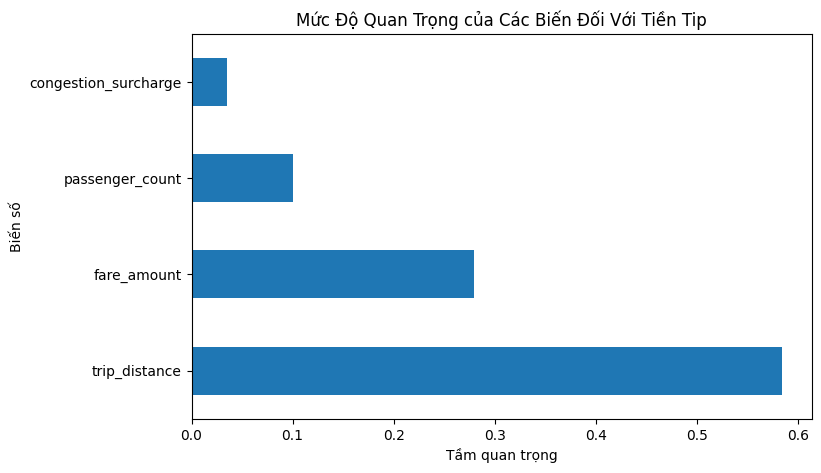

In [28]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = df[['fare_amount', 'trip_distance', 'passenger_count', 'congestion_surcharge']]
y = df['tip_amount']

rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)


feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Mức độ quan trọng của các biến:")
print(feature_importance)


plt.figure(figsize=(8, 5))
feature_importance.plot(kind='barh')
plt.title("Mức Độ Quan Trọng của Các Biến Đối Với Tiền Tip")
plt.xlabel("Tầm quan trọng")
plt.ylabel("Biến số")
plt.show()


We can see that The factor that has the biggest impact on tip amount is trip_distance

And we can see number of tip amount off each value

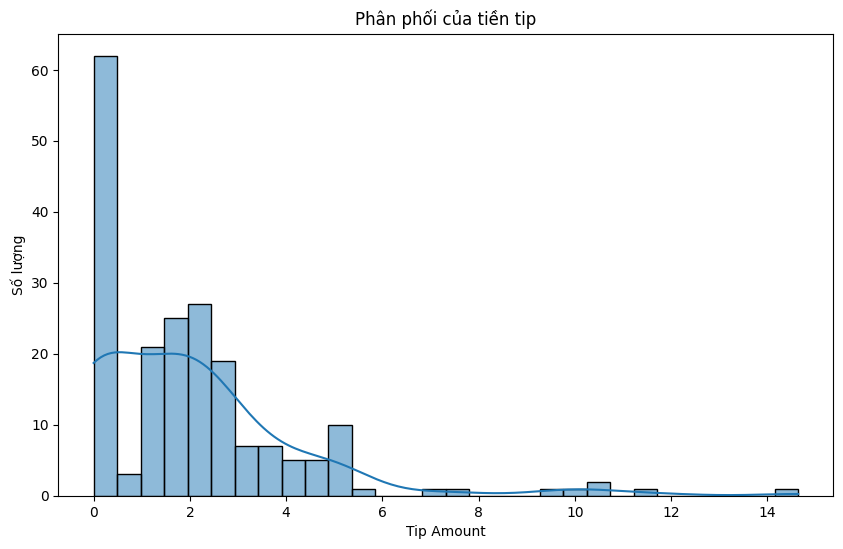

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ histogram cho tiền tip
plt.figure(figsize=(10, 6))
sns.histplot(df['tip_amount'], bins=30, kde=True)
plt.title("Phân phối của tiền tip")
plt.xlabel("Tip Amount")
plt.ylabel("Số lượng")
plt.show()

## What columns will most likely not be needed to answer the client's questions?

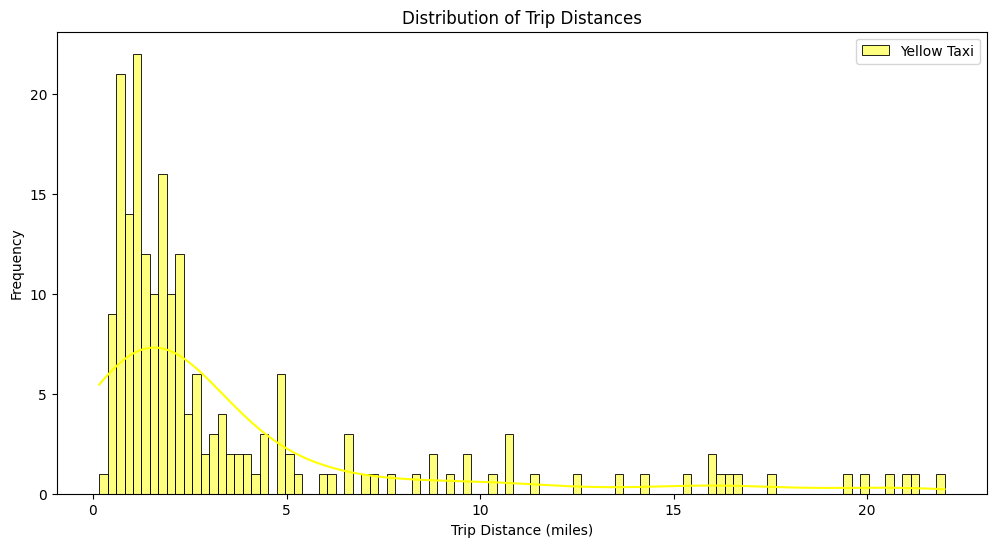

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='trip_distance', bins=100, kde=True, color='yellow', label='Yellow Taxi')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Trip Distances')
plt.show()

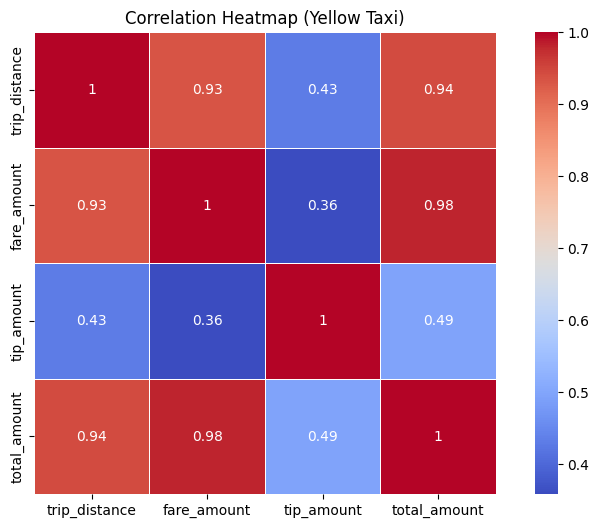

In [15]:
plt.figure(figsize=(10, 6))
correlation_matrix_yellow = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']].corr()
sns.heatmap(correlation_matrix_yellow, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap (Yellow Taxi)')
plt.show()

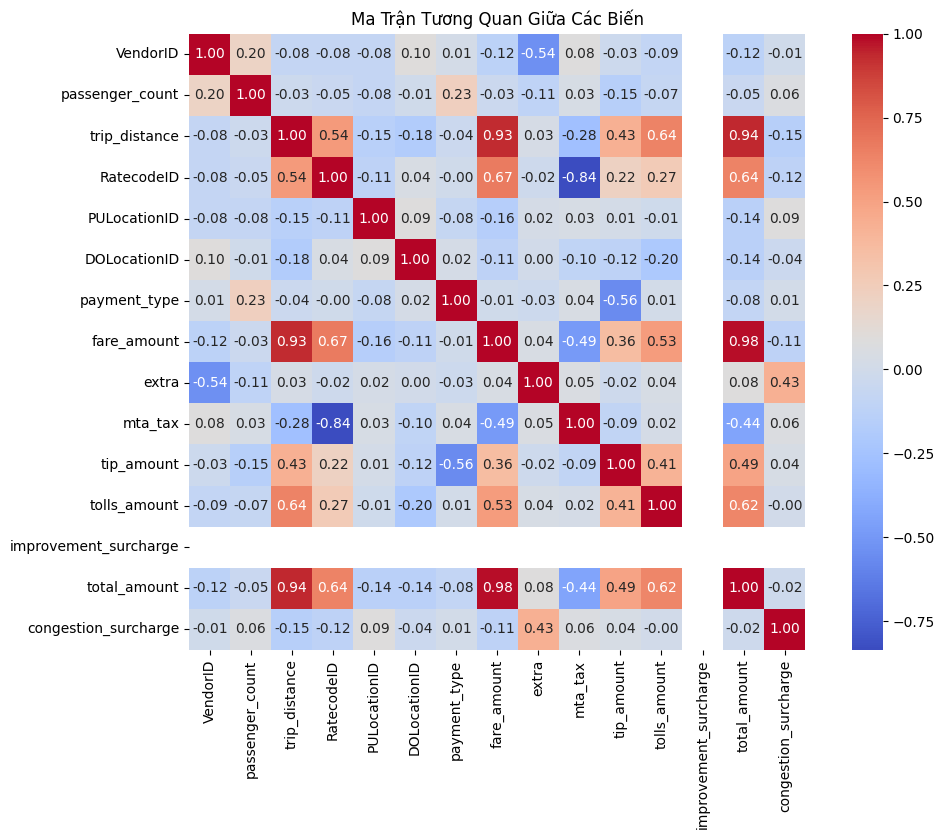

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

df_correlation = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_correlation.corr()

# Vẽ heatmap để hiển thị ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Ma Trận Tương Quan Giữa Các Biến")
plt.show()


From the correlation matrix above we can realize that there are some columns that do not have a correlation with tip amount such as VendorID, PULocationID, DOlocationID, extra, mta_tax, congestion_surcharge... so they are not needed to answer the questions. customer questions

# Based on what has been provided so far, does the data seem to provide any evidence of seasonal tipping behavior?

In [34]:
import pandas as pd

df = pd.read_csv('2019taxi.csv')

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['month'] = df['tpep_pickup_datetime'].dt.month

monthly_counts = df['month'].value_counts().sort_index()

print("Số lượng mẫu mỗi tháng:")
print(monthly_counts)



Số lượng mẫu mỗi tháng:
month
1     1000
4     1000
7     1000
10    1000
Name: count, dtype: int64


In [35]:
# Nếu có cột ngày giờ, trích xuất tháng từ đó
df['month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month
# Hoặc có thể thêm cột "mùa" (xuân, hạ, thu, đông) dựa vào tháng
df['season'] = df['month'].apply(lambda x: 'Spring' if 3 <= x <= 5 else
                                                'Summer' if 6 <= x <= 8 else
                                                'Fall' if 9 <= x <= 11 else 'Winter')


In [36]:
# Tiền tip trung bình theo tháng
monthly_tip_avg = df.groupby('month')['tip_amount'].mean()

# Hoặc tính tiền tip trung bình theo mùa
seasonal_tip_avg = df.groupby('season')['tip_amount'].mean()
print("Tiền tip trung bình theo mùa:")
print(seasonal_tip_avg)


Tiền tip trung bình theo mùa:
season
Fall      2.41760
Spring    2.59573
Summer    2.48470
Winter    1.67171
Name: tip_amount, dtype: float64


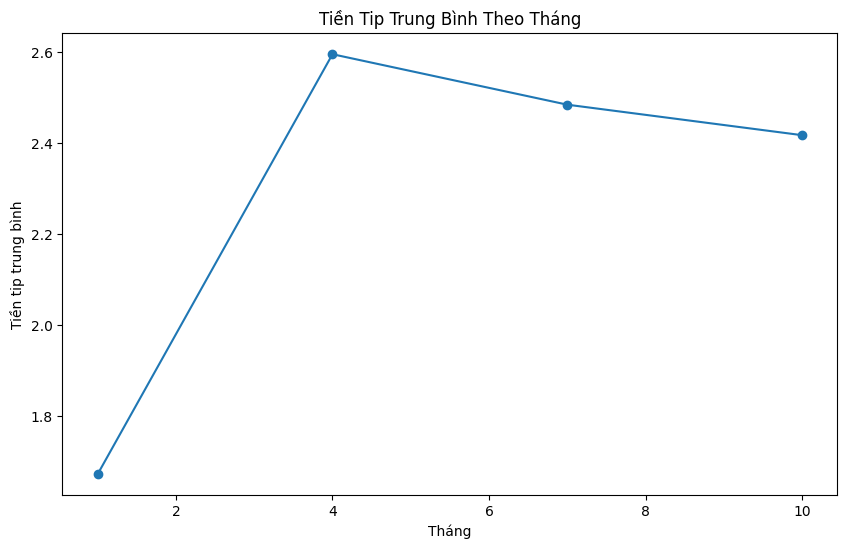

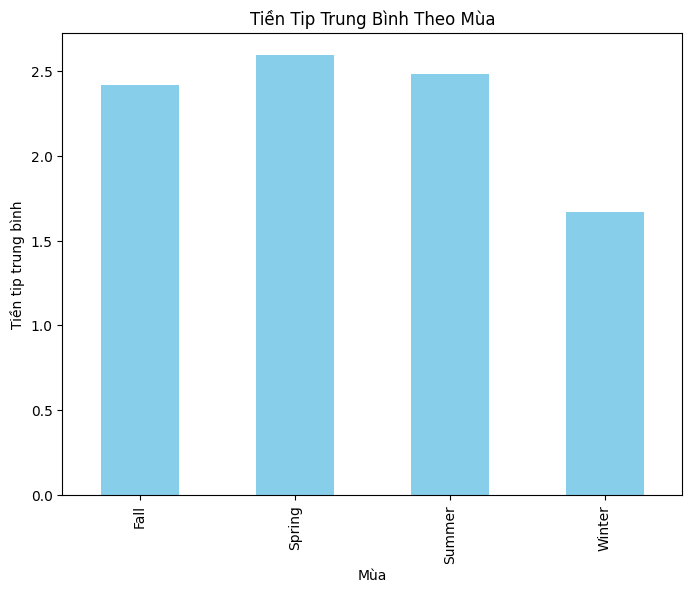

In [37]:
import matplotlib.pyplot as plt

# Biểu đồ đường cho tiền tip trung bình theo tháng
plt.figure(figsize=(10, 6))
monthly_tip_avg.plot(kind='line', marker='o')
plt.title("Tiền Tip Trung Bình Theo Tháng")
plt.xlabel("Tháng")
plt.ylabel("Tiền tip trung bình")
plt.show()

# Biểu đồ cột cho tiền tip trung bình theo mùa
plt.figure(figsize=(8, 6))
seasonal_tip_avg.plot(kind='bar', color='skyblue')
plt.title("Tiền Tip Trung Bình Theo Mùa")
plt.xlabel("Mùa")
plt.ylabel("Tiền tip trung bình")
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Thực hiện kiểm định ANOVA giữa các mùa
spring_tips = df[df['season'] == 'Spring']['tip_amount']
summer_tips = df[df['season'] == 'Summer']['tip_amount']
fall_tips = df[df['season'] == 'Fall']['tip_amount']
winter_tips = df[df['season'] == 'Winter']['tip_amount']

f_stat, p_value = f_oneway(spring_tips, summer_tips, fall_tips, winter_tips)
print("ANOVA test: F-statistic =", f_stat, ", p-value =", p_value)

ANOVA test: F-statistic = 18.911429753517233 , p-value = 3.5504561993551715e-12


1. F-statistic
Giá trị F-statistic: 18.9114
Đây là tỷ lệ giữa sự biến thiên giữa các nhóm (giá trị tiền tip theo mùa) và sự biến thiên trong mỗi nhóm. Một giá trị F lớn cho thấy rằng sự biến thiên giữa các nhóm là lớn hơn sự biến thiên trong nhóm, nghĩa là có khả năng tồn tại sự khác biệt thực sự giữa các nhóm.
2. p-value
Giá trị p-value: 3.5505e-12 (hay 0.0000000000035504561993551715)
P-value rất nhỏ (thường được so sánh với mức ý nghĩa alpha, thường là 0.05). Giá trị p này cho thấy xác suất rằng sự khác biệt quan sát được giữa các nhóm là do ngẫu nhiên. Một giá trị p rất nhỏ cho thấy rằng có rất ít khả năng rằng các khác biệt giữa các nhóm chỉ xảy ra bởi ngẫu nhiên.
3. Kết luận
Với F-statistic lớn và p-value rất nhỏ, chúng ta có thể kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa các nhóm (mùa) trong tiền tip. Điều này nghĩa là hành vi tip của khách hàng khác nhau giữa các mùa, cho thấy các yếu tố như thời tiết, kỳ nghỉ lễ, hoặc sự kiện đặc biệt có thể ảnh hưởng đến số tiền tip mà khách hàng để lại.
Tóm lại, chúng ta có thể kết luận rằng dữ liệu hỗ trợ giả thuyết rằng tiền tip có sự biến đổi theo mùa.